# CREDIT LOAN EDA ASSIGNMENT 

####

###  IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import composite_transform_factory

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
#To Avoid Warnings Using the FilterWarning Function
import warnings 
warnings.filterwarnings('ignore')

### DATA COLLECTION

In [4]:
#Loading(Collecting) Datasets

ad = pd.read_csv("application_data.csv")
pa = pd.read_csv("previous_application.csv")

In [7]:
ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [28]:
ad.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [29]:
ad.shape

(307511, 122)

In [9]:
ad.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [10]:
ad.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

#### Looking for Numeric and Object Datatypes


In [12]:
num_col = ad.select_dtypes(include=[np.number])
num_col.columns 

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [13]:
ob_col = ad.select_dtypes(include=[np.object])
ob_col.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

### Checking the null values

In [15]:
ad.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

### checking the percentage of missing value

In [18]:
perc_missing = round(ad.isnull().mean()*100,2)
perc_missing

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

#### There are null values present , so we can do by mean,or by dropping it or even by replacing it with 0 or something else.

#### For example in one above case we can remove columns with high percentage of missing value,threshold can be taken as 40%-50%

In [19]:
ad.duplicated().sum()

0

#### opting column for outliers 

In [20]:
list(ad.columns[(ad.isnull().mean()<=0.13)])

#we will pick the required variables

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHA

### Checking For Outliers

#### Amt_Annuity

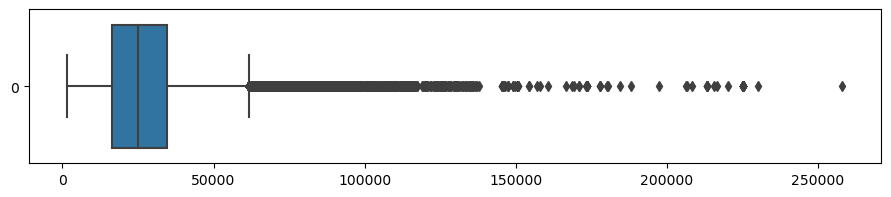

In [23]:
plt.figure(figsize=(11,2))
sns.boxplot(ad['AMT_ANNUITY'], orient = 'h')
plt.show()

In [24]:
#They have high outliers
#Imputing the outliers using median

ad.AMT_ANNUITY.median()

24903.0

##### AMT_GOODS_PRICE

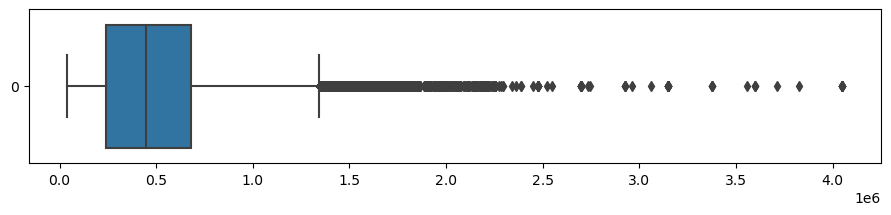

In [25]:
plt.figure(figsize= (11,2))
sns.boxplot(ad["AMT_GOODS_PRICE"],orient = 'h')
plt.show()

In [30]:
#They have high outliers
#Imputing the outliers using median

ad.AMT_GOODS_PRICE.median()

450000.0

#### NAME_TYPE_SUITE


In [29]:
ad.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [32]:
#High is Unaccompanied so we impute doing mode

name_suite = ad.NAME_TYPE_SUITE.mode()
name_suite

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

#### NAME_EDUCATION TYPE

In [33]:
ad.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [34]:
#### High is Secondary / Secondary special so we impute doing mode

eduhigh = ad.NAME_EDUCATION_TYPE.mode()
eduhigh

0    Secondary / secondary special
Name: NAME_EDUCATION_TYPE, dtype: object

#### EXT_SOURCE_1

In [36]:
ad.EXT_SOURCE_1.describe()

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

In [38]:
ad.EXT_SOURCE_1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: EXT_SOURCE_1
Non-Null Count   Dtype  
--------------   -----  
134133 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [39]:
ad.EXT_SOURCE_1.value_counts()

0.622707    5
0.443982    5
0.546426    5
0.581015    5
0.499002    5
0.598469    5
0.528197    5
0.667740    5
0.605152    5
0.356323    5
0.765724    5
0.584035    4
0.744822    4
0.675845    4
0.346065    4
0.550233    4
0.609345    4
0.296741    4
0.516443    4
0.614651    4
0.504062    4
0.613210    4
0.534438    4
0.655730    4
0.469762    4
0.410931    4
0.451748    4
0.509937    4
0.842690    4
0.548115    4
0.272960    4
0.570658    4
0.435406    4
0.584488    4
0.342503    4
0.586655    4
0.695548    4
0.465066    4
0.738365    4
0.384141    4
0.527299    4
0.475689    4
0.411716    4
0.580421    4
0.321464    4
0.590800    4
0.218606    4
0.410242    4
0.602788    4
0.709062    4
0.342696    4
0.289648    4
0.555174    4
0.430023    4
0.440622    4
0.817102    4
0.623446    4
0.618248    4
0.696614    4
0.608252    4
0.448246    4
0.762222    4
0.338143    4
0.703002    4
0.444379    4
0.714116    4
0.474148    4
0.705122    4
0.348994    4
0.255240    4
0.534251    4
0.6421

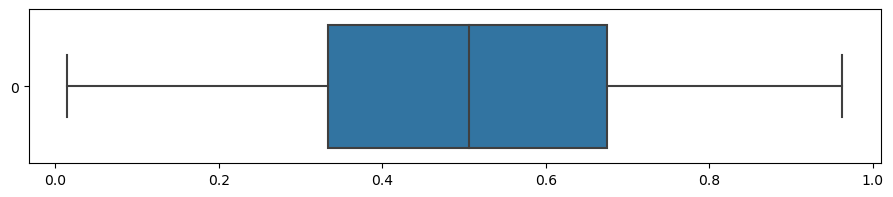

In [41]:
plt.figure(figsize = (11,2))
sns.boxplot(ad['EXT_SOURCE_1'],orient = "h")
plt.show()

In [42]:
#Mean and Median are quite close so median

ad.EXT_SOURCE_1.median()

0.5059979305057544

In [44]:
#CNT_FAM_MEMBERS

ad.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

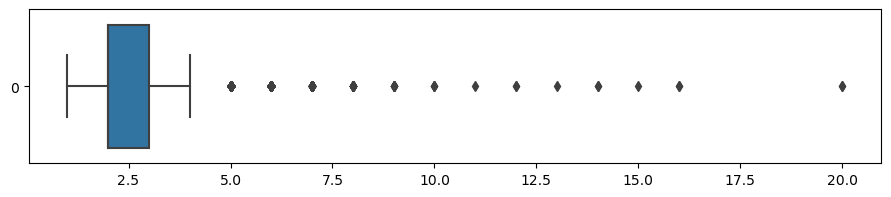

In [46]:
plt.figure(figsize= (11,2))
sns.boxplot(ad['CNT_FAM_MEMBERS'], orient = 'h')
plt.show()

In [47]:
#Very high Outliers so Median

ad.CNT_FAM_MEMBERS.median()

2.0

In [48]:
ad.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

In [53]:
pd.set_option("display.max_columns", None)
ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### Modifying some more value.


#### NAN can be seen, so we can replace that with 0 if needed.


In [54]:
#Convert the negative values to positive 
#Using absolute values is very handy so we do this.


In [56]:
ad['DAYS_BIRTH'] = ad['DAYS_BIRTH'].abs()
ad.DAYS_BIRTH.head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

#### DAYS_EMPLOYED

In [59]:

ad['DAYS_EMPLOYED']= ad['DAYS_EMPLOYED'].abs()
ad.DAYS_EMPLOYED.head()

0     637
1    1188
2     225
3    3039
4    3038
Name: DAYS_EMPLOYED, dtype: int64

#### DAYS_ID_PUBLISH

In [64]:
ad['DAYS_ID_PUBLISH']=ad['DAYS_ID_PUBLISH'].abs()
ad.DAYS_ID_PUBLISH.head()

0    2120
1     291
2    2531
3    2437
4    3458
Name: DAYS_ID_PUBLISH, dtype: int64

#### DAYS_REGISTRATION


In [66]:
ad['DAYS_REGISTRATION']=ad['DAYS_REGISTRATION'].abs()
ad.DAYS_REGISTRATION.head()

0    3648.0
1    1186.0
2    4260.0
3    9833.0
4    4311.0
Name: DAYS_REGISTRATION, dtype: float64

In [67]:
ad.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [ ]:
#Cannot deduce XNA in gender, either remove it or replace it with higher occurying but which might not be as appropriate so we do not change.

#### BINNING

In [69]:
ad.info(verbose=True, null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

#### BINNING CONTINOUS

In [92]:
ad['INCOME_BIN']= ad['AMT_INCOME_TOTAL']
bins = [100000, 400000, 800000, 1000000]
label = ["100000-400000","400000-800000","800000-1000000"]

ad["INCOME_GROUP"]= pd.cut(ad["INCOME_BIN"], bins=bins, labels=label)

In [93]:
ad.INCOME_GROUP.value_counts()

100000-400000     235750
400000-800000       7487
800000-1000000       326
Name: INCOME_GROUP, dtype: int64

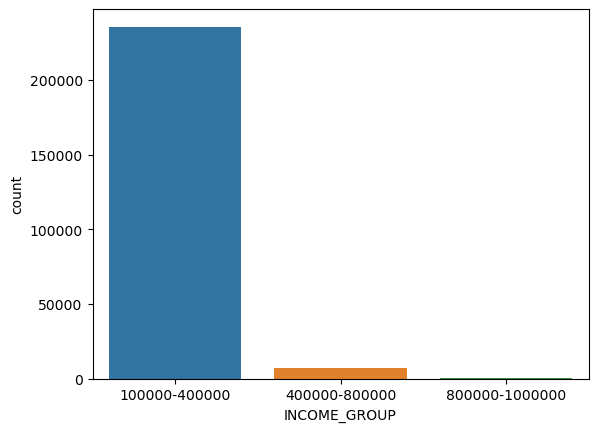

In [74]:
sns.countplot(x= 'INCOME_GROUP', data = ad)
plt.show()

In [80]:
ad['CRED_BIN'] = ad['AMT_CREDIT']
bins = [100000,400000,800000,1000000]
label = ["100000-400000","400000-800000","800000-1000000"]

ad["CRED_GROUP"] = pd.cut(ad["CRED_BIN"], bins=bins, labels=label)

In [81]:
ad.CRED_GROUP.value_counts()

100000-400000     111291
400000-800000     109512
800000-1000000     30719
Name: CRED_GROUP, dtype: int64

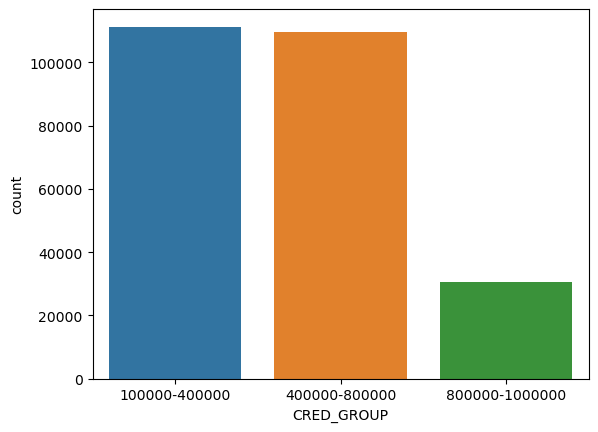

In [82]:
sns.countplot(x= 'CRED_GROUP', data= ad)
plt.show()

In [85]:
ad['ANNU_BIN'] = ad["AMT_ANNUITY"]
bins= [100000,300000,600000,900000,1200000]
label= ["100000-300000", "300000-600000","600000-900000","900000-1200000"]
ad["ANNU_GROUP"] = pd.cut(ad["ANNU_BIN"], bins= bins, labels= label)

In [86]:
ad.ANNU_GROUP.value_counts()

100000-300000     505
300000-600000       0
600000-900000       0
900000-1200000      0
Name: ANNU_GROUP, dtype: int64

<Axes: xlabel='ANNU_GROUP', ylabel='count'>

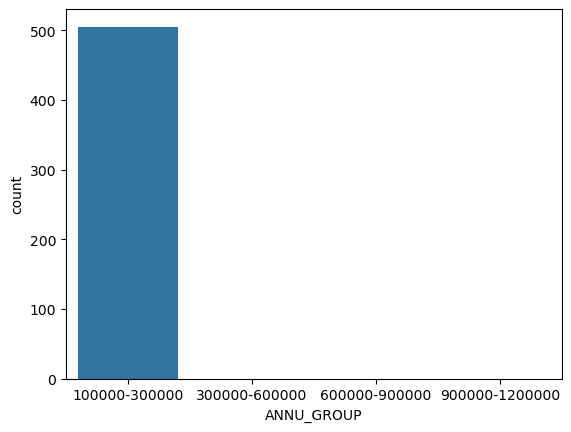

In [87]:
sns.countplot(x= 'ANNU_GROUP', data = ad)

In [88]:
ad['GOODS_PRICE']= ad["AMT_GOODS_PRICE"]
bins = [100000,200000,400000,600000,800000,1000000]
label = ["100000", "200000","400000", "600000", "800000+"]

ad["GOODS_GROUPS"] = pd.cut(ad["GOODS_PRICE"], bins=bins, labels= label)

In [89]:
ad.GOODS_GROUPS.value_counts()

200000     83980
400000     70090
600000     48134
100000     32956
800000+    29245
Name: GOODS_GROUPS, dtype: int64

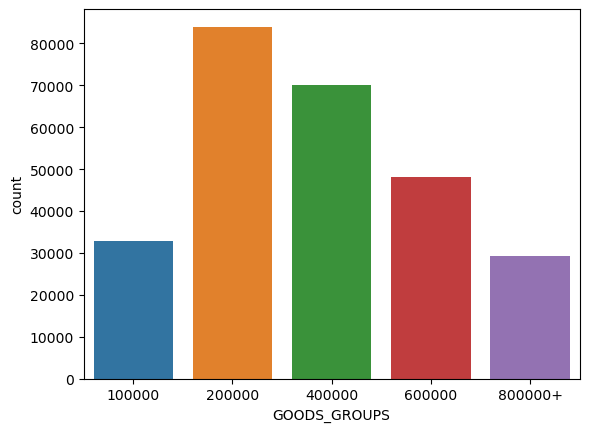

In [90]:
sns.countplot(x= 'GOODS_GROUPS', data = ad)
plt.show()

In [92]:
ad['REGION_BIN'] = ad['REGION_POPULATION_RELATIVE']
bins = [0,90000,100000,300000]
label=["1", "2", "3"]

ad["REGION_GROUPS"]= pd.cut(ad["REGION_POPULATION_RELATIVE"], bins=bins, labels=label)

In [93]:
ad.REGION_GROUPS.value_counts()

1    307511
2         0
3         0
Name: REGION_GROUPS, dtype: int64

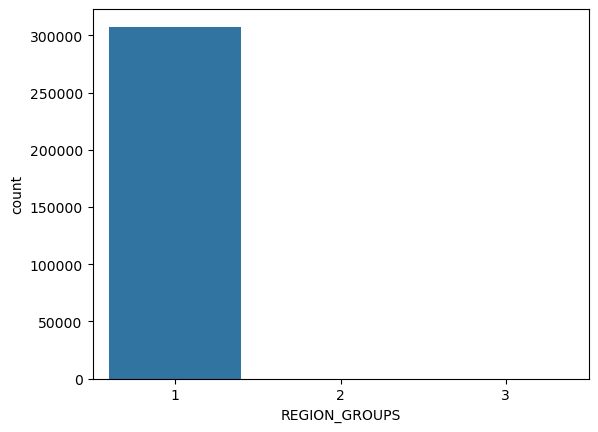

In [95]:
sns.countplot(x= 'REGION_GROUPS', data = ad)
plt.show()

In [96]:
ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120          NaN           1               1                0   
1              291          NaN           1               1                0   
2             2531         26.0           1               1                1   
3             2437          NaN           1               1                0   
4             3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

#### Examining and Analysing the Target



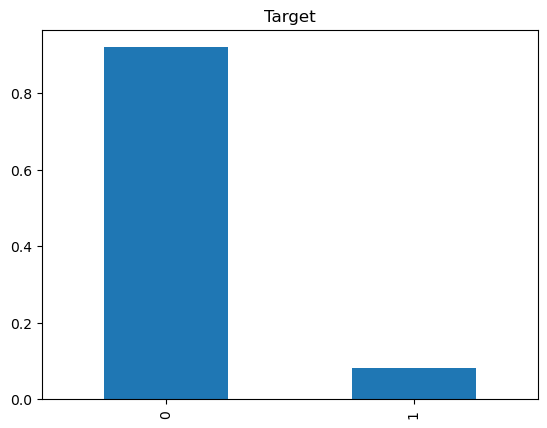

In [99]:
ad['TARGET'].value_counts(normalize = True).plot.bar()
plt.title('Target')
plt.show()

In [7]:
#This is clearly not balanced, 0 being the non defaulters and 1 being the defaulters
#Diving the Target

ad_zero = ad[ad.TARGET == 0] #Non Defaulters
ad_one = ad[ad.TARGET == 1] #Defaulters

In [103]:
imbalance_percentage = ad.TARGET.value_counts()/ len(ad)* 100
imbalance_percentage

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [104]:
#91.927118 for Non Defaulters and 8.072882 for Defaulters.
#Non Defaulters/Defaulters = 11.490875.

In [105]:
ad.TARGET.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

### Univarite Analysis for bz_zero and bz_one in TARGET

#### categorical


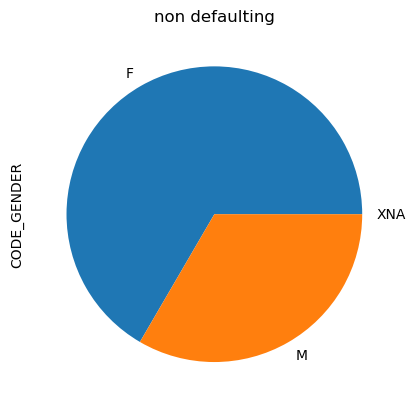

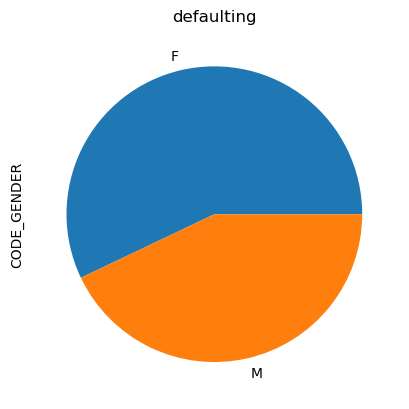

In [108]:
#CODE_GENDER

ad_zero.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.title('non defaulting')
plt.show()

ad_one.CODE_GENDER.value_counts(normalize=True).plot.pie()
plt.title('defaulting')
plt.show()

#FOR Target 0 and 1 the plot shows that Females tend to take more loan than Men.

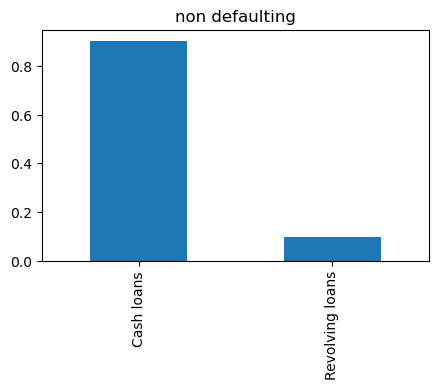

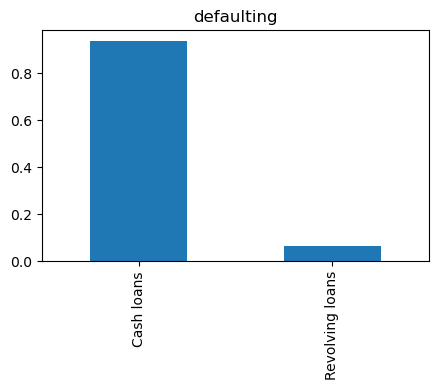

In [113]:
plt.figure(figsize=(5,3))

ad_zero.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('non defaulting')
plt.show()


plt.figure(figsize=(5,3))
ad_one.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.bar()
plt.title('defaulting')
plt.show()

#For Target 0 and 1 the plot shows that Cash Loans kind are being taken more

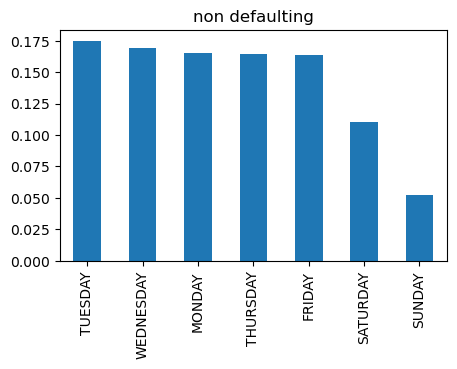

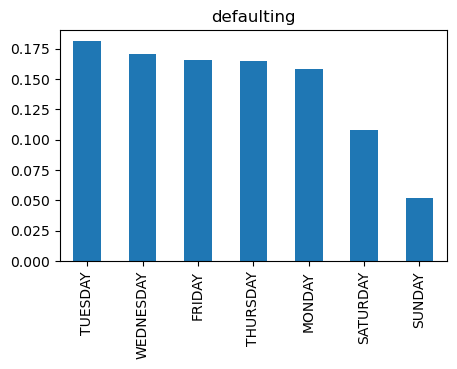

In [115]:
plt.figure(figsize=(5,3))
ad_zero.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('non defaulting')
plt.show()

plt.figure(figsize=(5,3))
ad_one.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()
plt.title('defaulting')
plt.show()

#For Target 0 and 1 the plot shows that Sunday has least intake for Loans

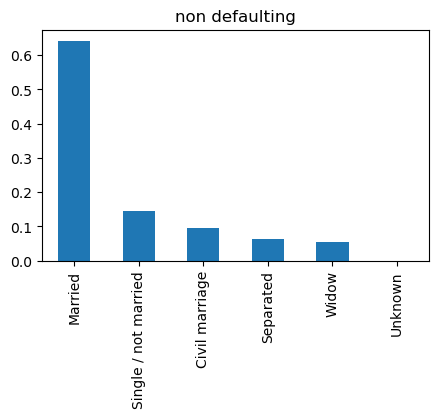

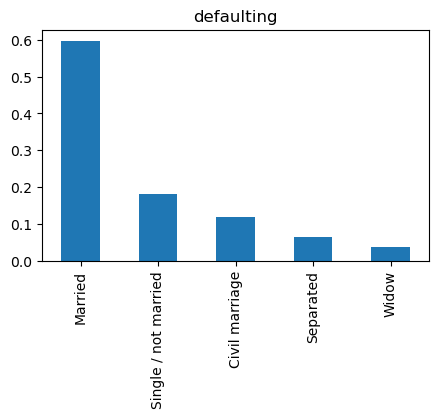

In [116]:
plt.figure(figsize= (5,3))

ad_zero.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('non defaulting')
plt.show()

#For Target 0 Married people tend to take the highest and widowers, seperated tend to tale almost same.

plt.figure(figsize=(5,3))
ad_one.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()
plt.title('defaulting')
plt.show()

#For Target 1 Married people tend to take the highest and widows take but least.
                                                               

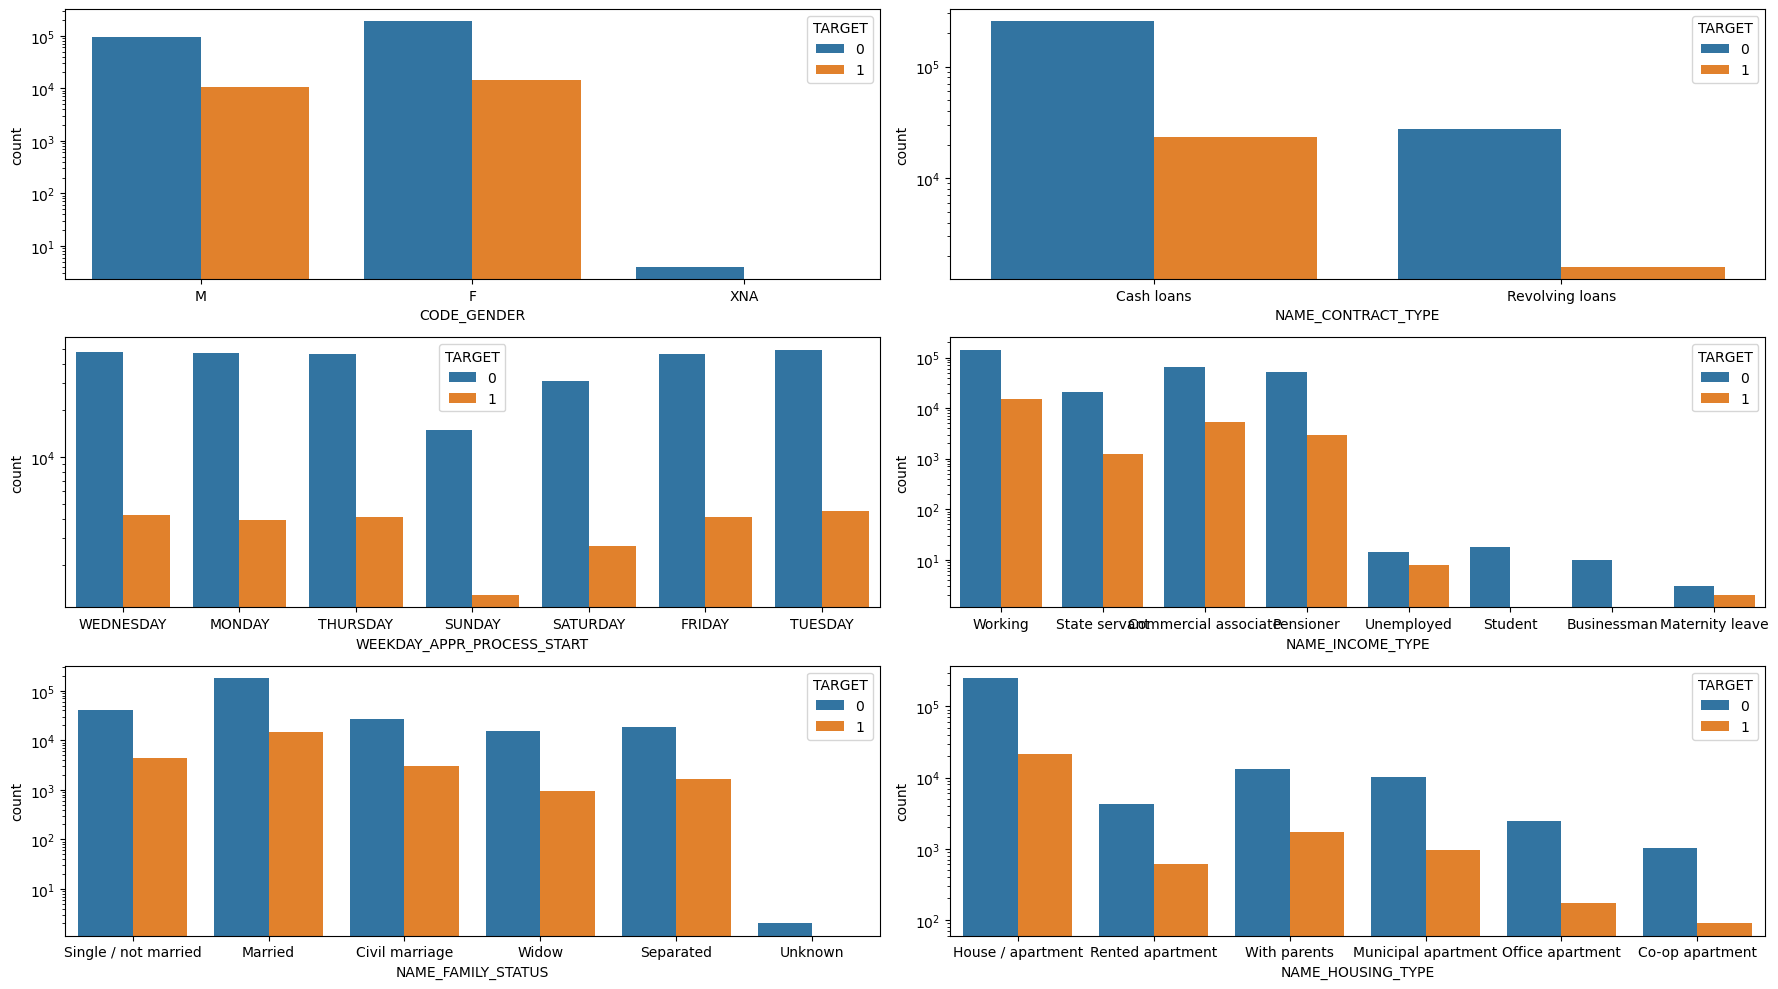

In [118]:
cate_col = ['CODE_GENDER','NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

plt.figure(figsize=(18,10))

for i, column in enumerate(cate_col):
    plt.subplot(len(cate_col) // 2, 2, i + 1)
    sns.countplot(x=column, hue='TARGET', data=ad)
    plt.yscale('log')

plt.tight_layout()
plt.show()

#The comparision:
#CODE_GENDER - Females tend to take more.
#NAME_CONTRACT_TYPE - Cash loans are taken more.
#WEEKDAY_APPR_PROCESS_START - Sundays,people usually not tend to come as other days.
#NAME_INCOME_TYPE - Working people tend to take more
#NAME_FAMILY_STATUS - Married people tend to take more.
#NAME_HOUSING_TYPE - More number of people have house/apartment and tend to default

#### Univariate Conti

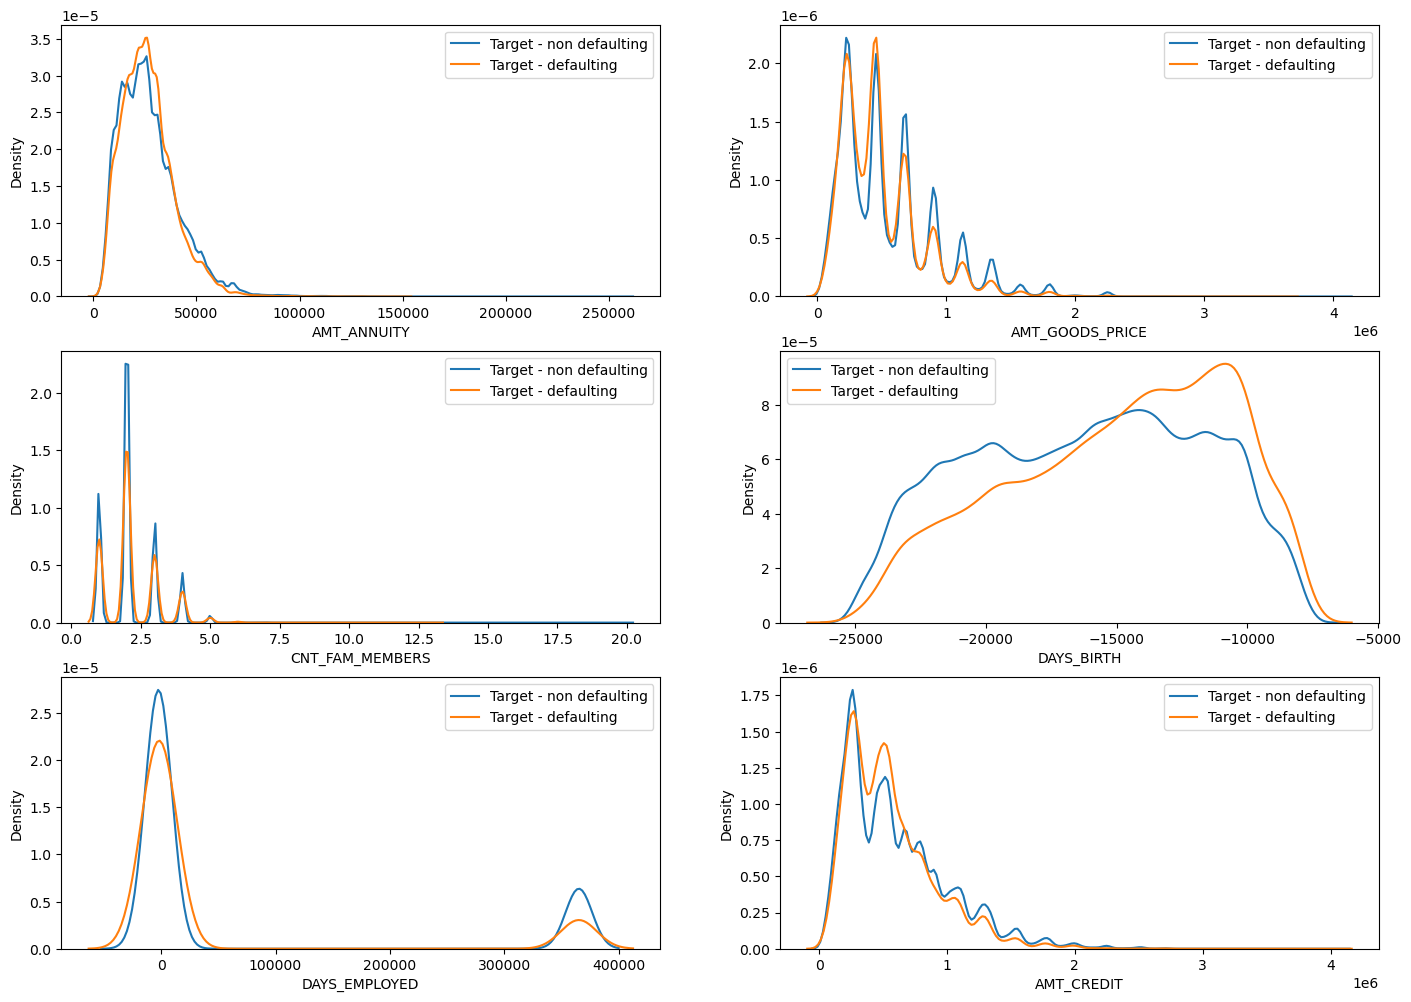

In [8]:

conti_col=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','DAYS_BIRTH',
                  'DAYS_EMPLOYED','AMT_CREDIT']
plt.figure(figsize=(17,12))
for i in (enumerate(conti_col)):

    plt.subplot(len(conti_col)//2,2,i[0]+1)
    sns.distplot(ad_zero[i[1]],label='Target - non defaulting',hist=False)
    sns.distplot(ad_one [i[1]],label='Target - defaulting',hist=False)
    plt.legend(loc='best')


plt.show()

#The Comparision
#AMT-ANNUITY - With low annuity,people tend to take more loans.
#AMT_GOODS_PRICE - With low goods price,tend to take more loans.
#CNT_FAM_MEMBERS - Lesser number of family members tend to take more loans.
#DAYS_BIRTH - 10000days old~27 years and 15000days~41 yeers take more loans.
#DAYS_EMPLOYED - Higher loans from new joinees at job with less days and longer employees are taking lesser loans.
#AMT_Credit - People with less credit take more loans.

#### Correlation for non defaulters 

In [10]:
co = ad_zero.corr()
coad = co.where(np.triu(np.ones(co.shape), k=1).astype(np.bool))
coad = coad.unstack().reset_index()
coad.columns = ['One', 'Two', 'Correlation']
coad.dropna(subset= ['Correlation'], inplace = True )
coad['Correlation'] = round(coad['Correlation'], 2)
coad['Correlation'] = abs(coad['Correlation'])
coad.sort_values(by='Correlation', ascending = False).head(11)

#Below are having the highest correlation

One                       Two  Correlation
7248            FLOORSMIN_MEDI             FLOORSMIN_AVG         1.00
1493            FLAG_EMP_PHONE             DAYS_EMPLOYED         1.00
6713          YEARS_BUILD_MEDI           YEARS_BUILD_AVG         1.00
7034            ENTRANCES_MEDI             ENTRANCES_AVG         1.00
7569           LIVINGAREA_MEDI            LIVINGAREA_AVG         1.00
6927            ELEVATORS_MEDI             ELEVATORS_AVG         1.00
6820           COMMONAREA_MEDI            COMMONAREA_AVG         1.00
8237  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE         1.00
7141            FLOORSMAX_MEDI             FLOORSMAX_AVG         1.00
6392           APARTMENTS_MEDI            APARTMENTS_AVG         1.00
7676  NONLIVINGAPARTMENTS_MEDI   NONLIVINGAPARTMENTS_AVG         0.99

#### Correlation for defaulters

In [13]:
co = ad_one.corr()
coad = co.where(np.triu(np.ones(co.shape), k=1).astype(np.bool))
coad = coad.unstack().reset_index()
coad.columns = ['One', 'Two', 'Correlation']
coad.dropna(subset = ['Correlation'], inplace = True)
coad['Correlation'] = round(coad['Correlation'], 2)
coad['Correlation'] = abs(coad['Correlation'])
coad.sort_values(by= 'Correlation', ascending = False).head(11)

#Below are having highest correlation

One                          Two  Correlation
1493                FLAG_EMP_PHONE                DAYS_EMPLOYED          1.0
7141                FLOORSMAX_MEDI                FLOORSMAX_AVG          1.0
7462         LIVINGAPARTMENTS_MEDI         LIVINGAPARTMENTS_AVG          1.0
8237      OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE          1.0
6192      NONLIVINGAPARTMENTS_MODE      NONLIVINGAPARTMENTS_AVG          1.0
7676      NONLIVINGAPARTMENTS_MEDI      NONLIVINGAPARTMENTS_AVG          1.0
6499             BASEMENTAREA_MEDI             BASEMENTAREA_AVG          1.0
7248                FLOORSMIN_MEDI                FLOORSMIN_AVG          1.0
7690      NONLIVINGAPARTMENTS_MEDI     NONLIVINGAPARTMENTS_MODE          1.0
6713              YEARS_BUILD_MEDI              YEARS_BUILD_AVG          1.0
6606  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG          1.0

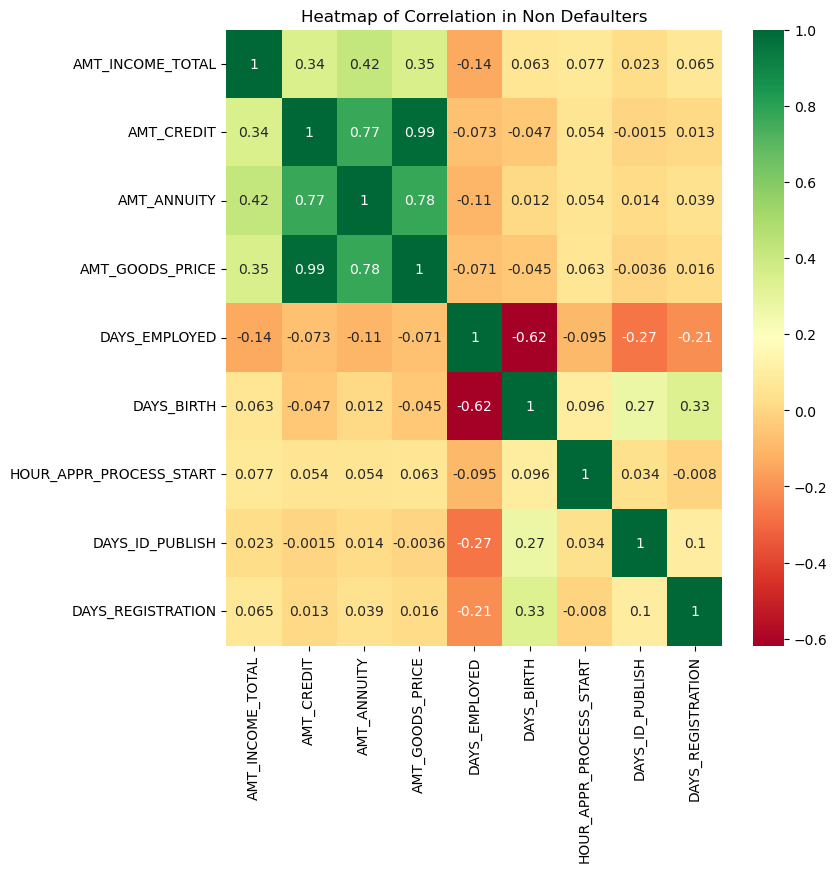

In [18]:
z_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
        'DAYS_EMPLOYED', 'DAYS_BIRTH', 'HOUR_APPR_PROCESS_START',
        'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION']

num_columns = ad_zero[z_cols]
co_mat = num_columns.corr()

plt.figure(figsize=[8,8])
sns.heatmap(co_mat, cmap='RdYlGn', annot=True)
plt.title('Heatmap of Correlation in Non Defaulters')
plt.show()


#Below have a good significant correlation
#AMT_CREDIT with AMT_GOODS_PRICE = 0.99
#AMT_ANNUTIY with AMT_GOODS_PRICE = 0.78



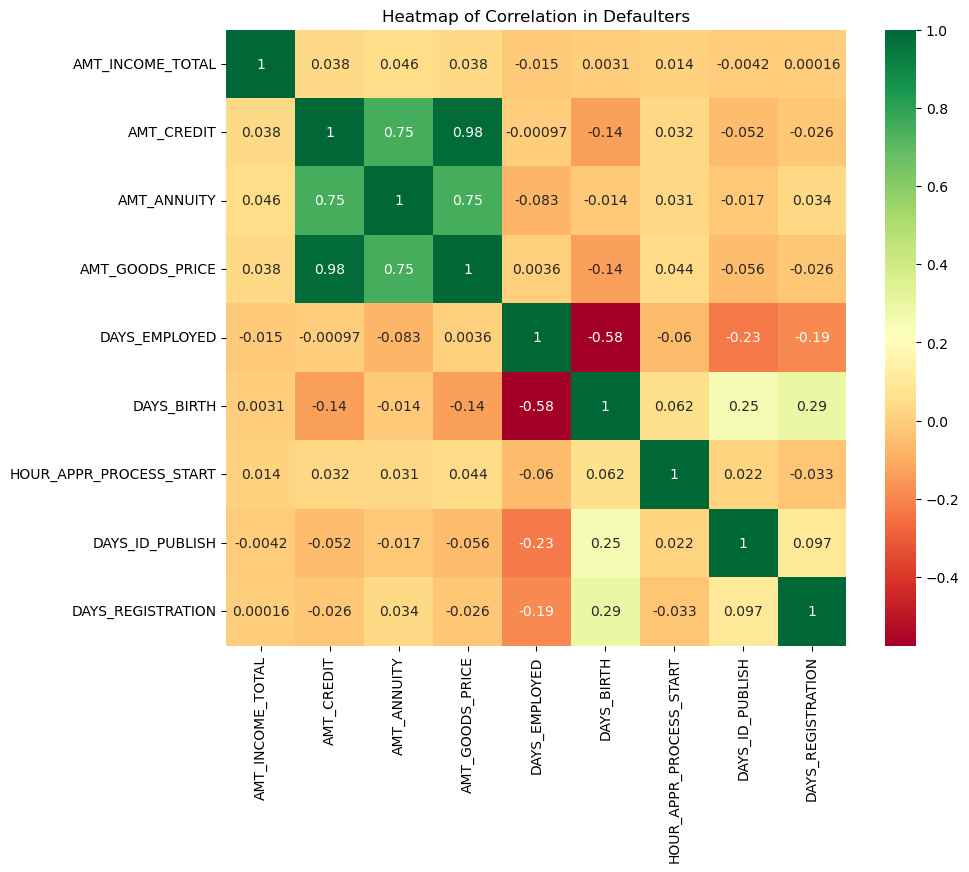

In [19]:
o_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
        'DAYS_EMPLOYED', 'DAYS_BIRTH', 'HOUR_APPR_PROCESS_START',
        'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION']

numm_columns = ad_one[o_cols]
cor_mat = numm_columns.corr()

plt.figure(figsize=[10,8])
sns.heatmap(cor_mat, cmap='RdYlGn', annot=True)
plt.title('Heatmap of Correlation in Defaulters')
plt.show()

#Below have a good significant correlation
#AMT_CREDIT with AMT_GOODS_PRICE = 0.99
#AMT_ANNUTIY with AMT_CREDIT and AMT_GOODS_PRICE = 0.78


#### Bivariate analysis

In [30]:
ad.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

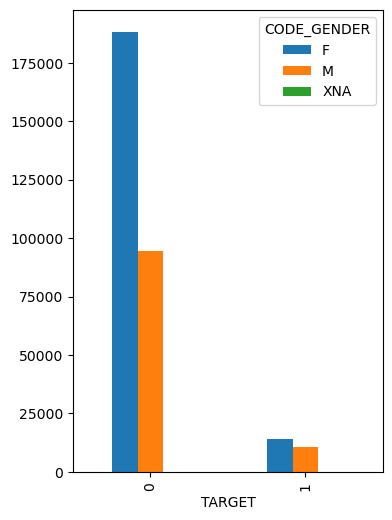

In [36]:
co_plot = pd.crosstab(index=ad['TARGET'], columns = ad['CODE_GENDER'])
co_plot.plot(kind= 'bar', figsize=(4,6))
plt.show()

#More Cash Loans by Female in both 0 and 1

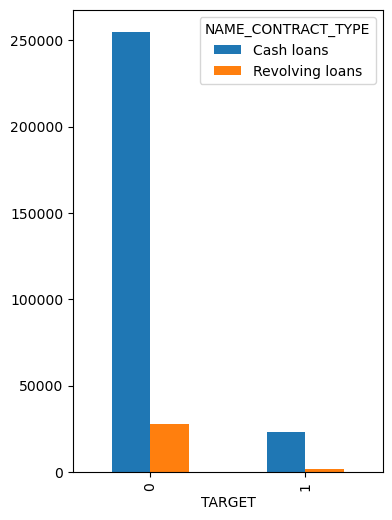

In [39]:
contract_plot= pd.crosstab(index=ad['TARGET'],columns=ad['NAME_CONTRACT_TYPE'])
contract_plot.plot(kind="bar", figsize=(4,6))
plt.show()
#More Cash Loans in both 0 and 1

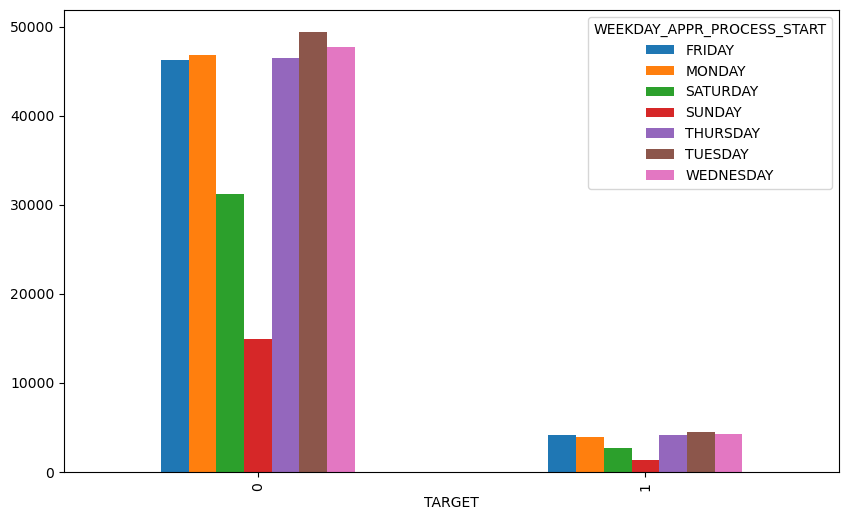

In [42]:
week_plot = pd.crosstab(index=ad['TARGET'],columns = ad['WEEKDAY_APPR_PROCESS_START'])
week_plot.plot(kind="bar", figsize=(10,6))
plt.show()

#Highest on Tuesday and Lowest on Sunday in both 0 and 1

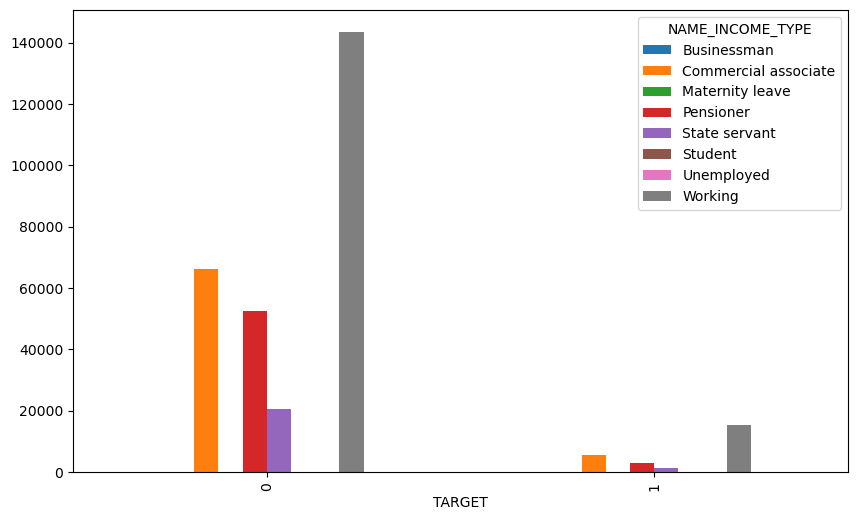

In [43]:
inc_plot = pd.crosstab(index=ad['TARGET'], columns = ad['NAME_INCOME_TYPE'])
inc_plot.plot(kind="bar",figsize=(10,6))
plt.show()

#Working people take more in both 0 and 1

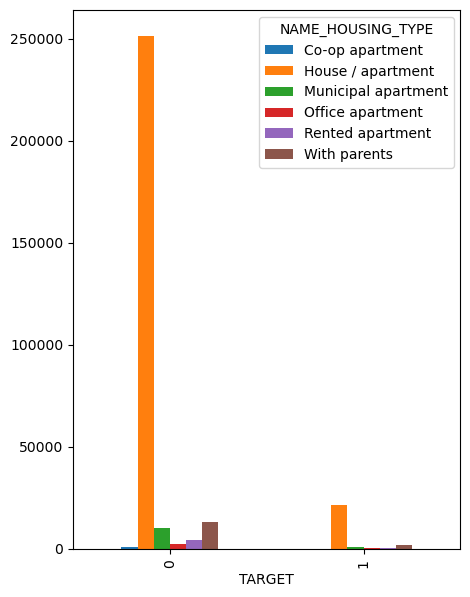

In [46]:
house_plot = pd.crosstab(index=ad['TARGET'], columns = ad['NAME_HOUSING_TYPE'])
house_plot.plot(kind="bar", figsize=(5,7))
plt.show()


#People with Housing take more in both 0 and 1


#### List of continous columns



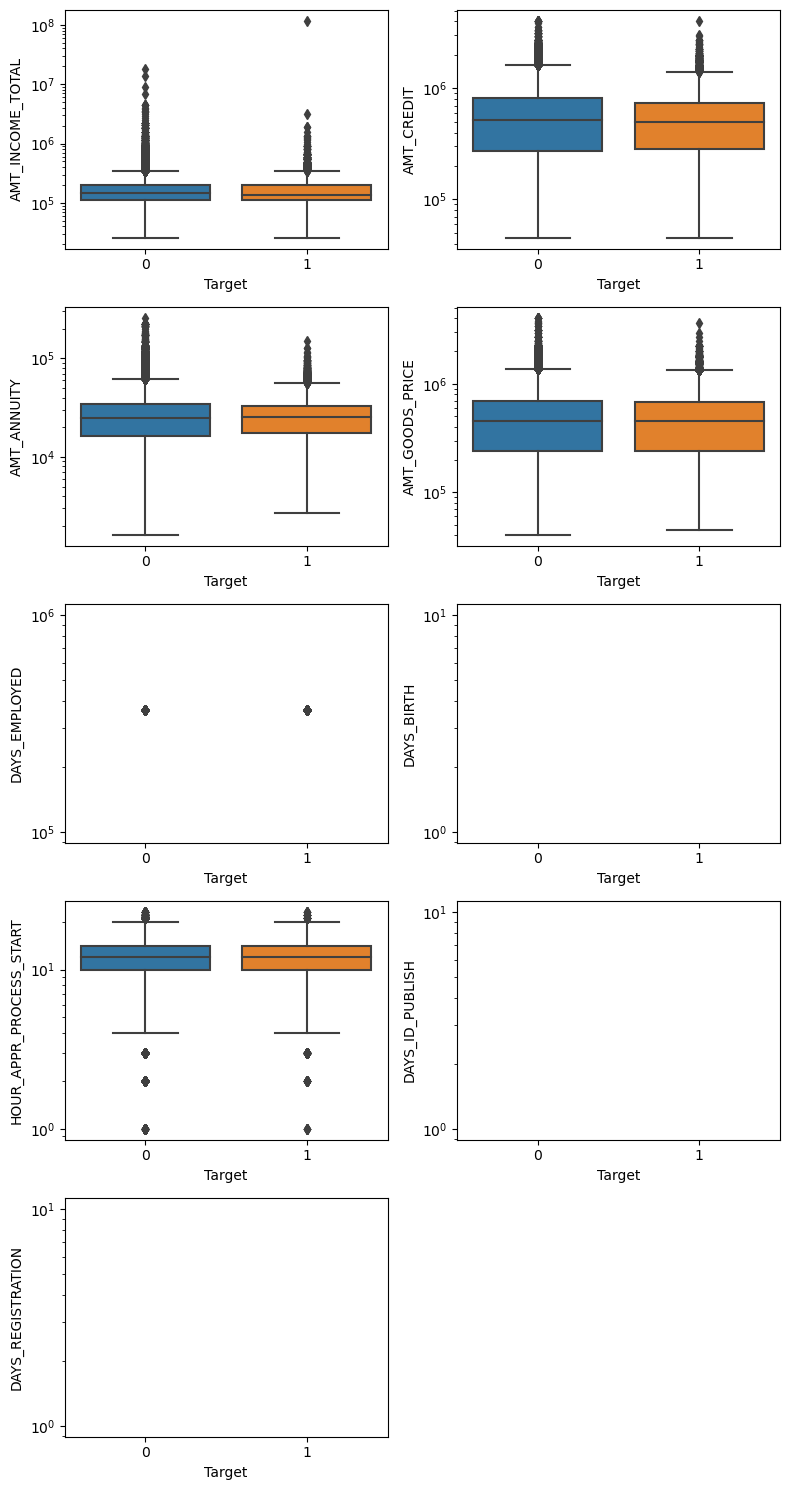

In [48]:
continous_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                    'DAYS_EMPLOYED', 'DAYS_BIRTH', 'HOUR_APPR_PROCESS_START',
                    'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION']
plt.figure(figsize =(8,15))

for i, column in enumerate(continous_columns):
    plt.subplot(5,2, i+1)
    sns.boxplot(x='TARGET', y=column, data = ad)
    plt.yscale('log')
    plt.xlabel('Target')
    plt.ylabel(column)
    
plt.tight_layout()
plt.show()

#AMT_INCOME_TOTAL - Defaulters are having less income
#AMT_CREDIT - Defaulters below a certain limit tend to default more
#AMT_ANNUITY- Defaulters are high
#AMT_GOODS_PRICE - Outliers are present more in non defaulting.
#DAYS_EMPLOYED - Employed for lesser days are defaulting more.
#HOUR_APPR_PROCESS_START - Equal time taken for application process to start
#DAYS_ID_PUBLISH - Publishing the ID's differing and delayed in non defaults
#DAYS_REGISTRATION - Registration details changed after 4500 days.

#### Examining and Analysing For The Previous Application

In [51]:
pa.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [52]:
pa.info(verbose = True, null_counts= True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [53]:
pa.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [54]:
pa.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [55]:
round(100*pa.isnull().sum()/len(pa),2 )

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

#### Converting the variables with values from negative to positive

In [56]:
pa['DAYS_DECISION'] = pa['DAYS_DECISION'].abs()
pa.DAYS_DECISION.head()

0     73
1    164
2    301
3    512
4    781
Name: DAYS_DECISION, dtype: int64

In [57]:
pa['SELLERPLACE_AREA'] = pa['SELLERPLACE_AREA'].abs()
pa.SELLERPLACE_AREA.head()

0    35
1     1
2     1
3     1
4     1
Name: SELLERPLACE_AREA, dtype: int64

In [58]:
pa['DAYS_FIRST_DRAWING']= pa['DAYS_FIRST_DRAWING'].abs()
pa.DAYS_FIRST_DRAWING.head()

0    365243.0
1    365243.0
2    365243.0
3    365243.0
4         NaN
Name: DAYS_FIRST_DRAWING, dtype: float64

In [60]:
pa['DAYS_FIRST_DUE']= pa['DAYS_FIRST_DUE'].abs()
pa.DAYS_FIRST_DUE.head()

0     42.0
1    134.0
2    271.0
3    482.0
4      NaN
Name: DAYS_FIRST_DUE, dtype: float64

In [61]:
pa['DAYS_LAST_DUE_1ST_VERSION']= pa['DAYS_LAST_DUE_1ST_VERSION'].abs()
pa.DAYS_LAST_DUE_1ST_VERSION.head()


0    300.0
1    916.0
2     59.0
3    152.0
4      NaN
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [63]:
pa['DAYS_LAST_DUE']=pa['DAYS_LAST_DUE'].abs()
pa.DAYS_LAST_DUE.head()

0        42.0
1    365243.0
2    365243.0
3       182.0
4         NaN
Name: DAYS_LAST_DUE, dtype: float64

In [65]:
pa['DAYS_TERMINATION'] = pa['DAYS_TERMINATION'].abs()
pa.DAYS_TERMINATION.head()

0        37.0
1    365243.0
2    365243.0
3       177.0
4         NaN
Name: DAYS_TERMINATION, dtype: float64

In [66]:
imbalance_per = pa.NAME_CONTRACT_STATUS.value_counts()/ len(pa)*100
imbalance_per

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

#### Bivariate

In [68]:
pa.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0             73  Cash through the bank                XAP              NaN   
1            164                    XNA                XAP    Unaccompanied   
2            301  Cash through the bank                XAP  Spouse, partner   
3            512  Cash through the bank                XAP              NaN   
4            781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                 1                  XNA   
2  Credit and cash offices                 1                  XNA   
3  Credit and cash offices                 1                  XNA   
4  Credit and cash offices                 1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

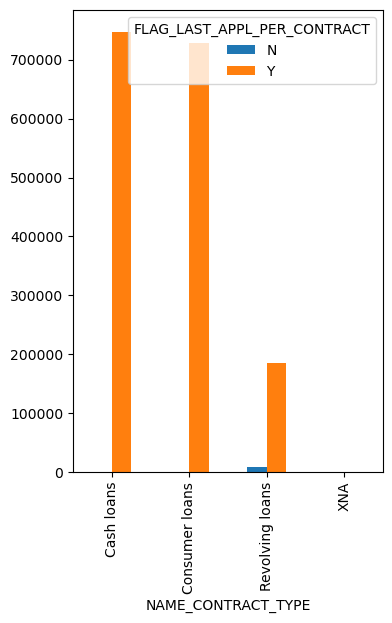

In [71]:
last_appl = pd.crosstab(index=pa['NAME_CONTRACT_TYPE'],columns=pa['FLAG_LAST_APPL_PER_CONTRACT'])
last_appl.plot(kind='bar',figsize=(4,6))
plt.show()

#Cash Loans are high but consumer Loans are also close to it.


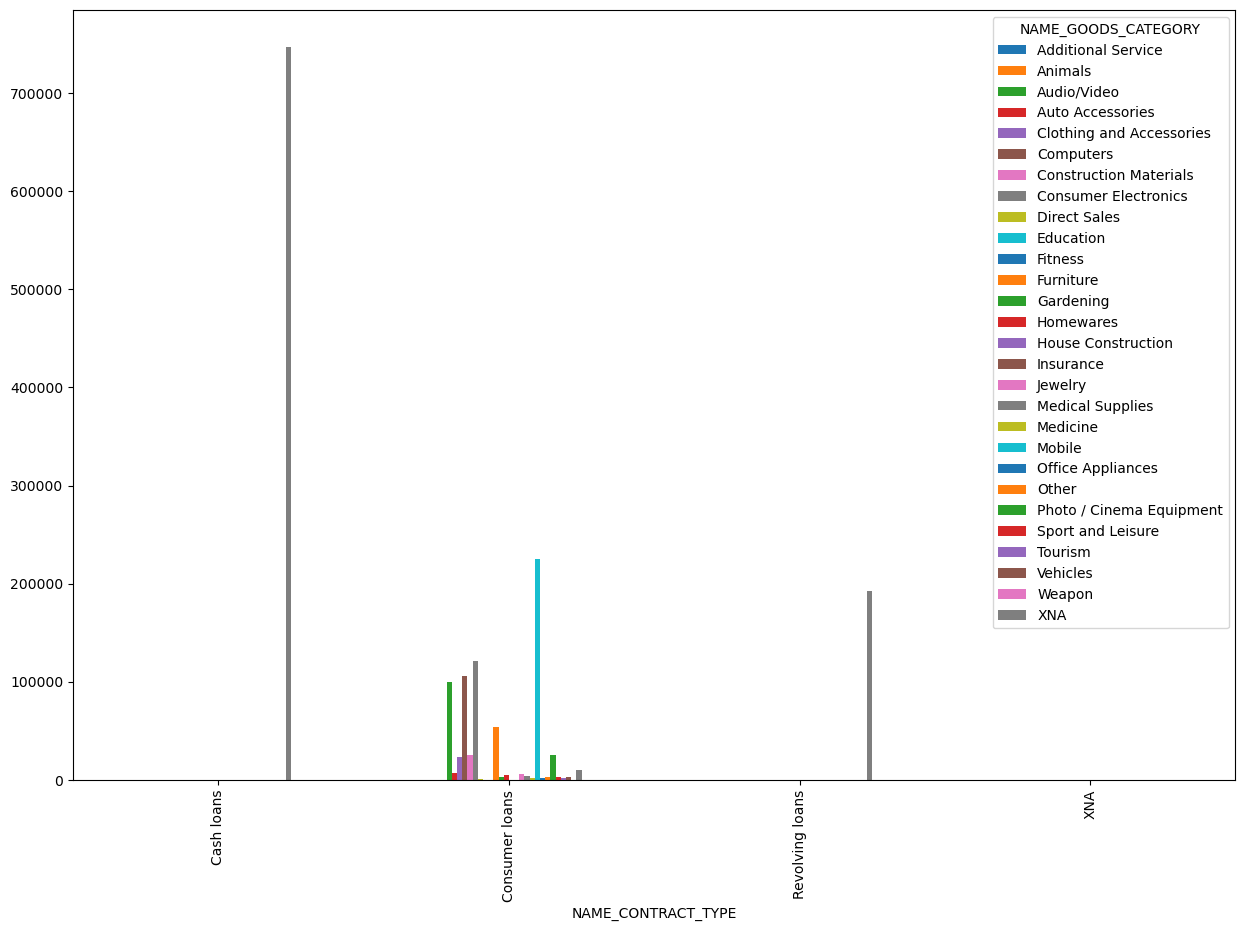

In [73]:
goods_ty = pd.crosstab(index=pa['NAME_CONTRACT_TYPE'], columns=pa['NAME_GOODS_CATEGORY'])
goods_ty.plot(kind="bar", figsize=(15,10))
plt.show()

#Consumer Electronics are taken the highest by cash loans


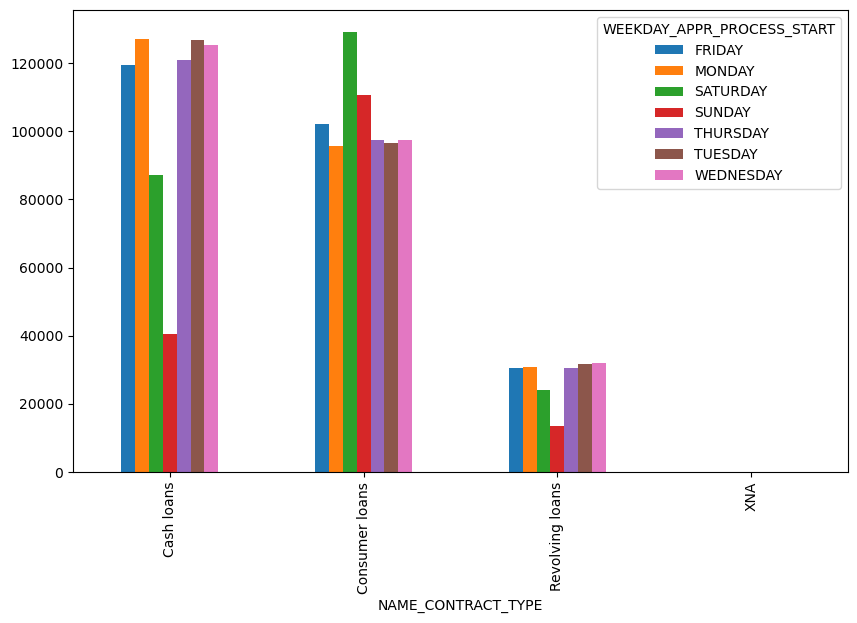

In [74]:
wee_plot = pd.crosstab(index=pa["NAME_CONTRACT_TYPE"], columns=pa["WEEKDAY_APPR_PROCESS_START"])
wee_plot.plot(kind="bar", figsize=(10,6))
plt.show()

#Consumer Loans are mostly taken on saturdays

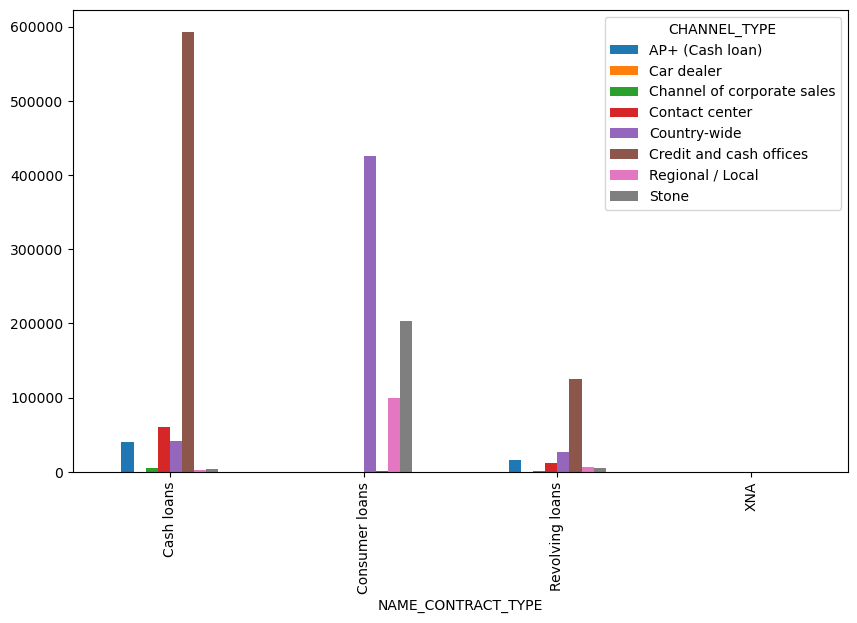

In [75]:
chan_plot = pd.crosstab(index=pa['NAME_CONTRACT_TYPE'], columns=pa['CHANNEL_TYPE'])
chan_plot.plot(kind="bar",figsize=(10,6))
plt.show()

#Credit and Cash Offices Procedures mostly on Cash Loans

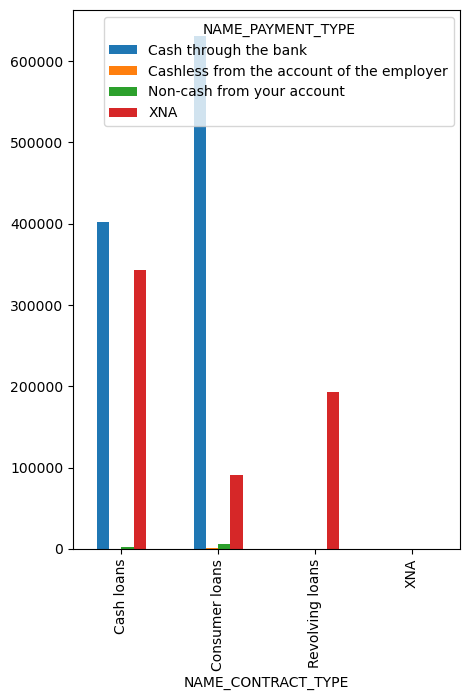

In [77]:
fa_plot= pd.crosstab(index=pa['NAME_CONTRACT_TYPE'], columns= pa['NAME_PAYMENT_TYPE'])
fa_plot.plot(kind = "bar",figsize= (5,7))
plt.show()

#Consumer Loans through cash via bank are high

#### Continuous

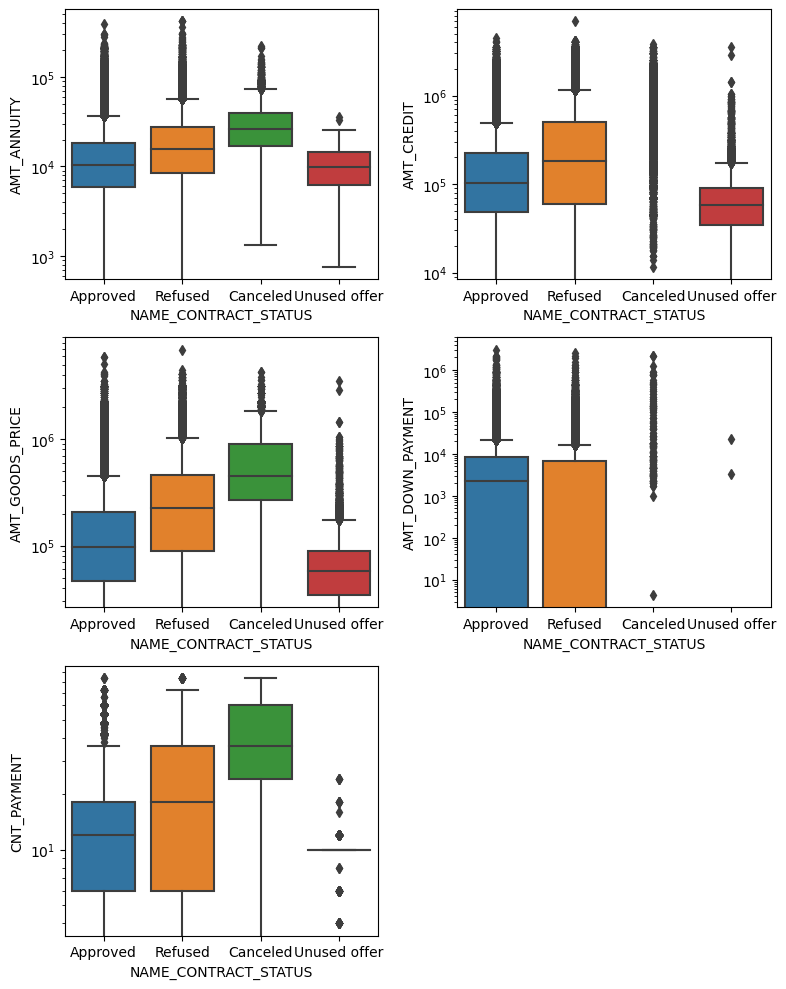

In [79]:
cont_columns = ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_DOWN_PAYMENT', 'CNT_PAYMENT']

plt.figure(figsize=(8,10))

for index, column in enumerate(cont_columns):
    plt.subplot(len(cont_columns)//2 + 1, 2, index + 1)
    sns.boxplot(x='NAME_CONTRACT_STATUS', y=column, data= pa)
    plt.yscale('log')
    plt.xlabel('NAME_CONTRACT_STATUS')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#AMT_ANNUITY - Refusals tend to be more.
#AMT_CREDIT and AMT_DOWN_PAYMENT has the most cancelled applications.
#AMT_GOODS_PRICE - Refused and Cancelled are more prominent.
#CNT_PAYMENT - Unused offers are not so useful.


In [8]:
bz_mer =pd.merge(ad,pa,how='left',on='SK_ID_CURR',suffixes=('_Latest', '_Old'))
bz_mer.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_Latest CODE_GENDER FLAG_OWN_CAR  \
0      100002       1                Cash loans           M            N   
1      100003       0                Cash loans           F            N   
2      100003       0                Cash loans           F            N   
3      100003       0                Cash loans           F            N   
4      100004       0           Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_Latest  \
0               Y             0          202500.0           406597.5   
1               N             0          270000.0          1293502.5   
2               N             0          270000.0          1293502.5   
3               N             0          270000.0          1293502.5   
4               Y             0           67500.0           135000.0   

   AMT_ANNUITY_Latest  AMT_GOODS_PRICE_Latest NAME_TYPE_SUITE_Latest  \
0             24700.5                351000.0          Unaccompanied   
1             35698.5               1129500.0                 Family   
2             35698.5               1129500.0                 Family   
3             35698.5               1129500.0                 Family   
4              6750.0                135000.0          Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2    State servant               Higher education               Married   
3    State servant               Higher education               Married   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                    0.018801       -9461           -637   
1  House / apartment                    0.003541      -16765          -1188   
2  House / apartment                    0.003541      -16765          -1188   
3  House / apartment                    0.003541      -16765          -1188   
4  House / apartment                    0.010032      -19046           -225   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          NaN           1   
1            -1186.0             -291          NaN           1   
2            -1186.0             -291          NaN           1   
3            -1186.0             -291          NaN           1   
4            -4260.0            -2531         26.0           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                0                 1           1           0   
3               1                0                 1           1           0   
4               1                1                 1           1           0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2      Core staff              2.0                     1   
3      Core staff              2.0                     1   
4        Laborers              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_Latest  \
0                            2                         WEDNESDAY   
1                            1                            MONDAY   
2                            1                            MONDAY   
3                            1                            MONDAY   
4                            2                            MONDAY   

   HOUR_APPR_PROCESS_START_Latest  REG_REGION_NOT_LIVE_REGION  \
0                              10        

#### Univariate
#### Categorical

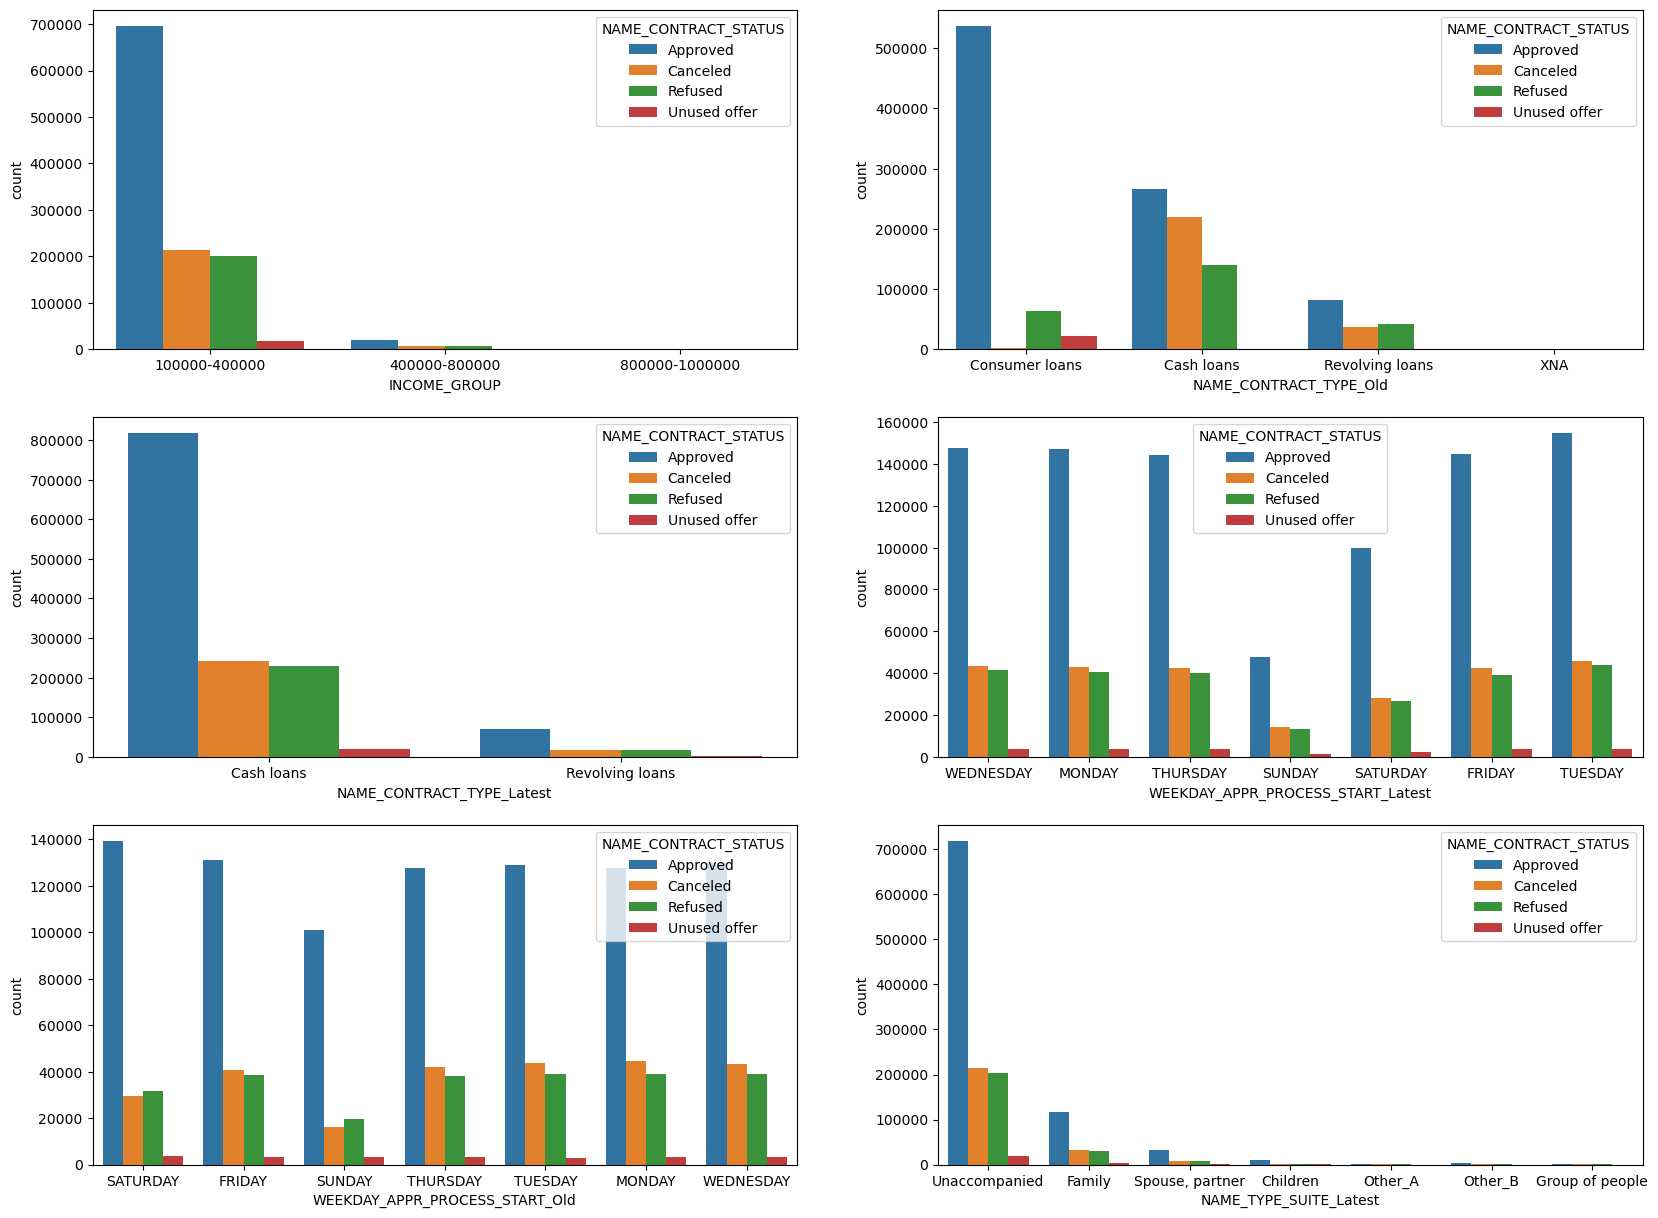

In [98]:


categorical_columns=['INCOME_GROUP','NAME_CONTRACT_TYPE_Old','NAME_CONTRACT_TYPE_Latest','WEEKDAY_APPR_PROCESS_START_Latest','WEEKDAY_APPR_PROCESS_START_Old',
                     'NAME_TYPE_SUITE_Latest']


plt.figure(figsize=(20,15))
for i in (enumerate(categorical_columns)):
    plt.subplot(len(categorical_columns) // 2, 2, i[0] + 1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=bz_mer)

plt.show()

#INCOME_GROUP - High approval is for high income group
#NAME_CONTRACT_TYPE_Old - Highe approval for consumer loans
#NAME_CONTRACT_TYPE_Latest - High  approval for cash loans
#WEEKDAY_APR_PROCESS_START_Latest - High approval is for Tuesday
#WEEKDAY_APR_PROCESS_START_Old - High approval is for Saturday
#NAME_TYPE_SUITE_Latest - High approval for Unaccompanied

#### Bivariate
#### Categorical

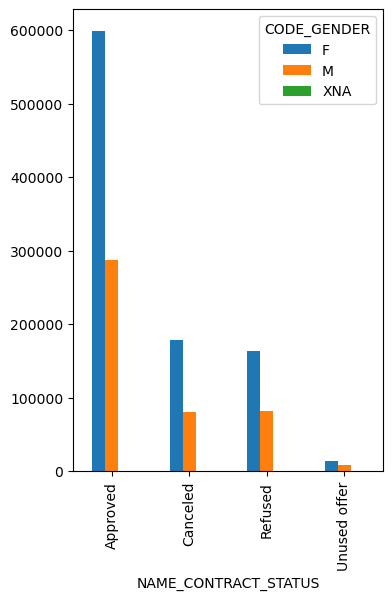

In [10]:
gen_plot= pd.crosstab(index=bz_mer['NAME_CONTRACT_STATUS'],columns=bz_mer['CODE_GENDER'])
gen_plot.plot(kind="bar", figsize=(4,6))
plt.show()
#Females have high approval

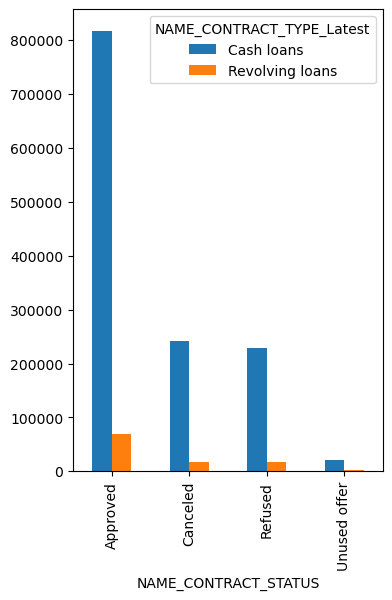

In [11]:
cont_plot = pd.crosstab(index=bz_mer['NAME_CONTRACT_STATUS'], columns=bz_mer['NAME_CONTRACT_TYPE_Latest'])
cont_plot.plot(kind="bar",figsize=(4,6))
plt.show()

#Cash Loans have high approval

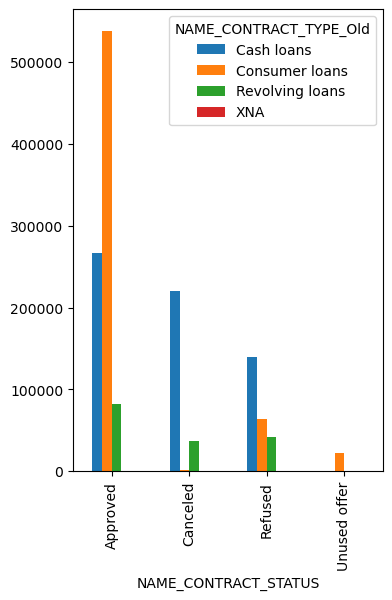

In [12]:
cont_plot_old = pd.crosstab(index=bz_mer['NAME_CONTRACT_STATUS'],columns=bz_mer['NAME_CONTRACT_TYPE_Old'])
cont_plot_old.plot(kind='bar', figsize=(4,6))
plt.show()

#Consumer Loans have high approval

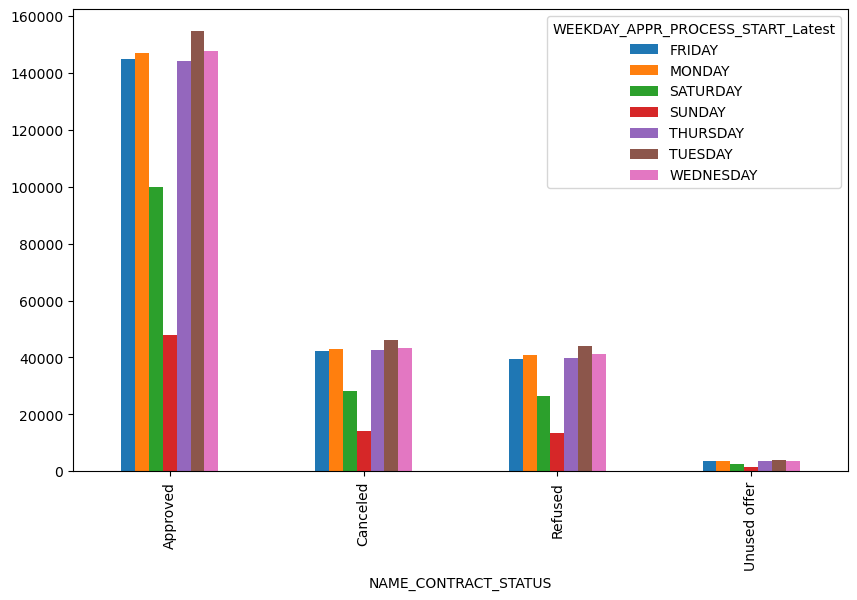

In [13]:
weekl_plot= pd.crosstab(index=bz_mer['NAME_CONTRACT_STATUS'],columns=bz_mer['WEEKDAY_APPR_PROCESS_START_Latest'])
weekl_plot.plot(kind="bar", figsize=(10,6))
plt.show()
#Tuesday has high approval

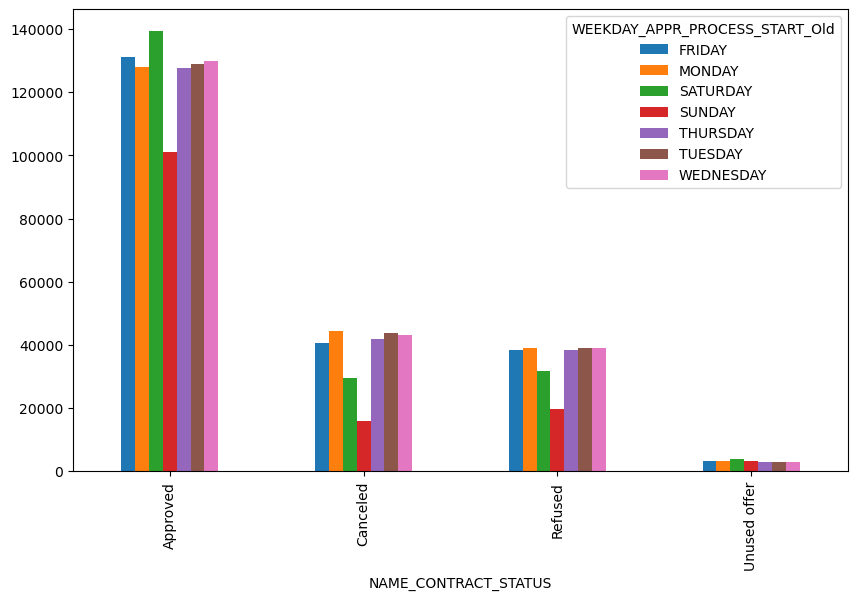

In [14]:
weeko_plot= pd.crosstab(index=bz_mer['NAME_CONTRACT_STATUS'],columns=bz_mer['WEEKDAY_APPR_PROCESS_START_Old'])
weeko_plot.plot(kind="bar", figsize=(10,6))
plt.show()
#Saturday has highest approval

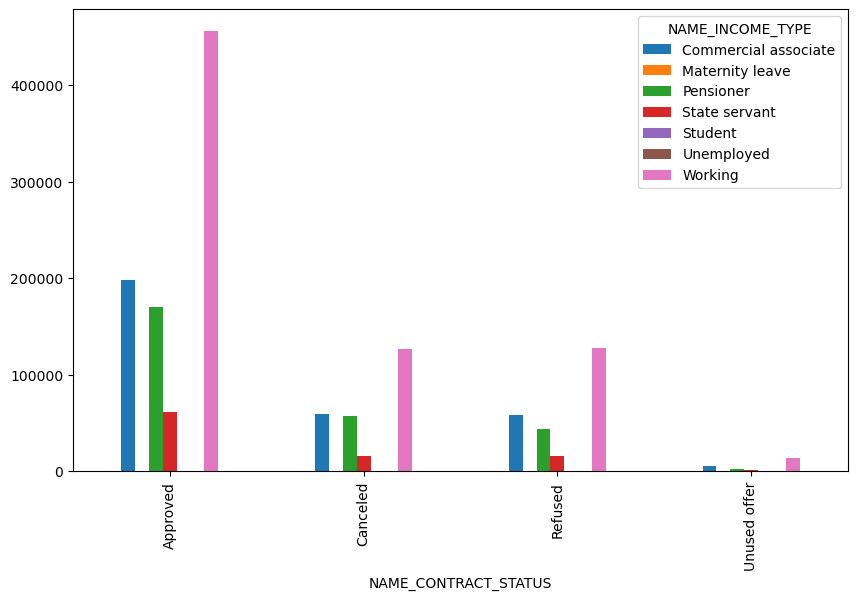

In [15]:
incm_plot= pd.crosstab(index=bz_mer['NAME_CONTRACT_STATUS'],columns=bz_mer['NAME_INCOME_TYPE'])
incm_plot.plot(kind="bar", figsize=(10,6))
plt.show()
#Working have highest approval

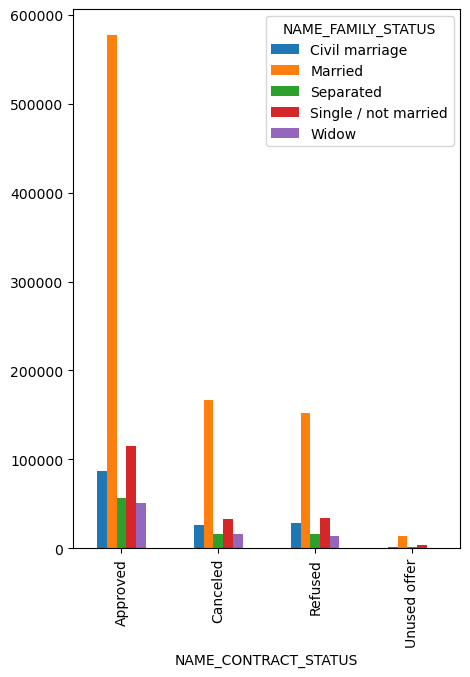

In [16]:
famer_plot = pd.crosstab(index=bz_mer['NAME_CONTRACT_STATUS'], columns=bz_mer['NAME_FAMILY_STATUS'])
famer_plot.plot(kind='bar', figsize=(5,7))
plt.show()

#Married have highest approval

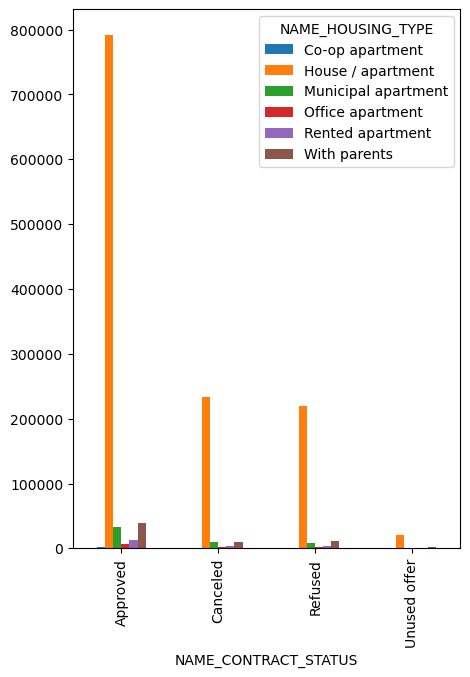

In [18]:
housem_plot = pd.crosstab(index=bz_mer['NAME_CONTRACT_STATUS'],columns=bz_mer['NAME_HOUSING_TYPE'])
housem_plot.plot(kind="bar", figsize=(5,7))
plt.show()

#People with house/apartment have higher approval

#### Continuous Columns

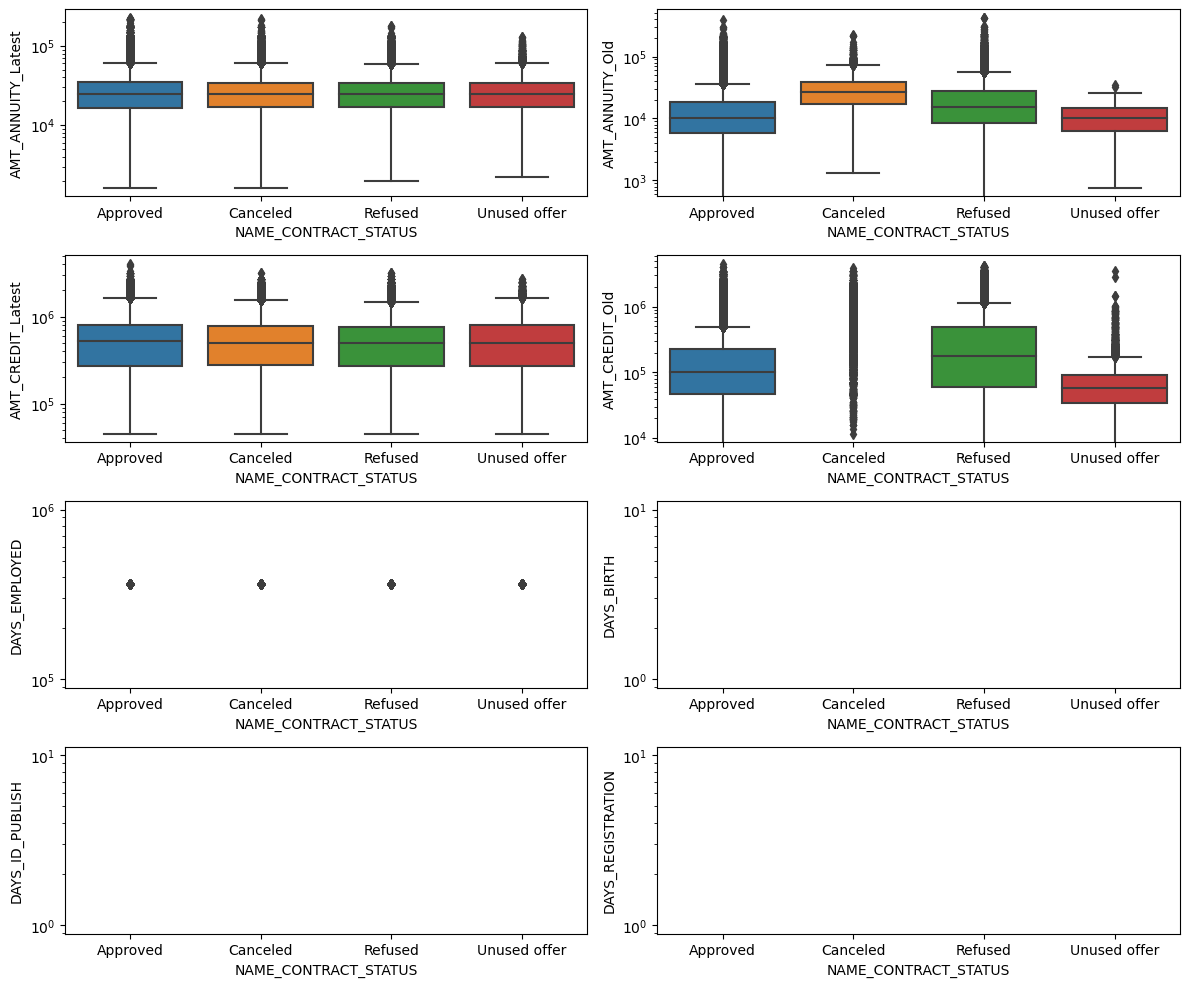

In [12]:
cont_columns= ['AMT_ANNUITY_Latest', 'AMT_ANNUITY_Old', 'AMT_CREDIT_Latest', 'AMT_CREDIT_Old',
               'DAYS_EMPLOYED', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION']

plt.figure(figsize=(12,12))              

for i, column in enumerate(cont_columns):
    plt.subplot(len(cont_columns)//2 + 1, 2, i + 1)
    sns.boxplot(x= 'NAME_CONTRACT_STATUS', y=column, data=bz_mer)
    plt.yscale('log')
    plt.xlabel('NAME_CONTRACT_STATUS')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

#AMT_ANNUITY_Latest and AMT_CREDIT_Latest are the same
#AMT_CREDIT_Old - Highest cancelled

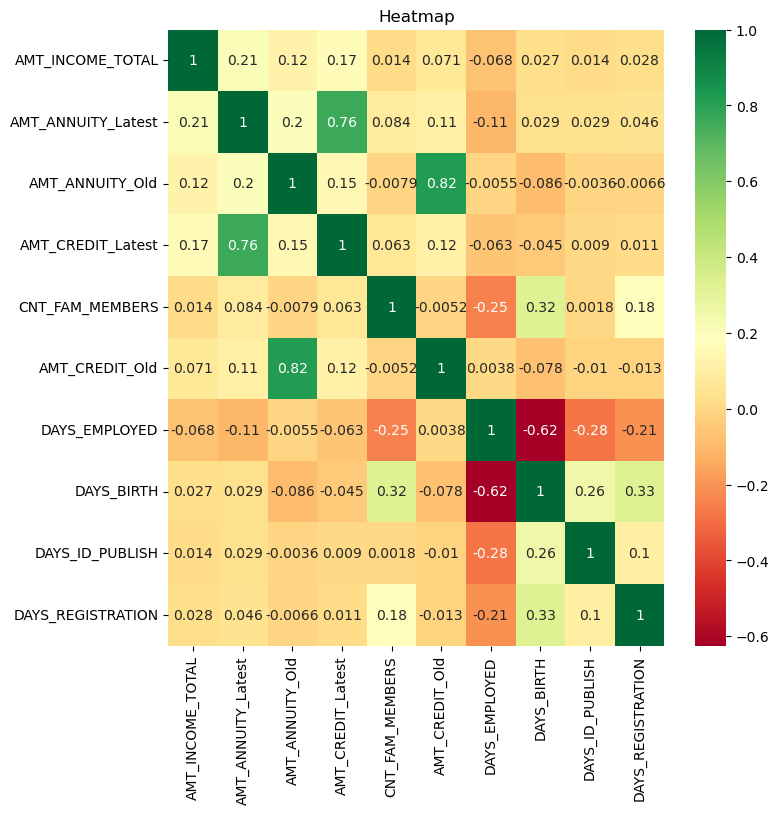

In [13]:
#Multivariate

mer_cols = ['AMT_INCOME_TOTAL','AMT_ANNUITY_Latest','AMT_ANNUITY_Old','AMT_CREDIT_Latest','CNT_FAM_MEMBERS','AMT_CREDIT_Old',
                'DAYS_EMPLOYED', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION']

nu_columns = bz_mer[mer_cols]
corr_mat = nu_columns.corr()

plt.figure(figsize=[8,8])
sns.heatmap(corr_mat, cmap='RdYlGn', annot=True)
plt.title('Heatmap')
plt.show()


#Below have a good significant correlation
#AMT_ANNUTIY_Latest with AMT_CREDIT_Latest = 0.76
#AMT_ANNUITY_Old with AMT_CREDIT_Old = 0.82
#DAYS_EMPLOYED with DAYS_BIRTH = 0.63

# Conclusion

1. The clients who had gotten previous approval have less payment difficulties so they are better candidates for approval of loan.
2. Clients whose application was cancelled are more risk to default.
3. Banks should focus more on contract type 'Student','Pensioner and Businessman' 
4. Occupation : Unemployed, unskilled labors and people with less stable jobs are more likely to default
